In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import random
from collections import defaultdict

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
import zipfile


import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input, BatchNormalization, LeakyReLU, Conv2DTranspose, Dropout, ReLU, Concatenate, ZeroPadding2D
import os
from glob import glob
from PIL import Image
import shutil

from kaggle_datasets import KaggleDatasets

import os
import random
import time

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers
import matplotlib.pyplot as plt


2025-04-29 00:31:15.023868: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745886675.268132      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745886675.333358      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Exploratory Data Analysis (EDA) for Kaggle Competition: I'm Something of a Painter Myself

## Overview
The Kaggle competition "I'm Something of a Painter Myself" challenges participants to use Generative Adversarial Networks (GANs) to generate Monet-style paintings, either by transforming photos into Monet-style art or creating new images from scratch. The dataset, located at `/kaggle/input/gan-getting-started/`, contains images of Monet paintings and photos in both JPEG and TFRecord formats. This document summarizes the Exploratory Data Analysis (EDA) performed to understand the dataset's structure, verify its integrity, and gain insights into its characteristics, laying the groundwork for building a GAN model, such as CycleGAN, for style transfer.

## Dataset Description
The dataset is organized into four directories:
- **monet_jpg**: 300 Monet paintings in JPEG format, each 256x256 pixels.
- **photo_jpg**: 7,038 photos in JPEG format, each 256x256 pixels (slightly more than the expected 7,028, possibly due to dataset updates).
- **monet_tfrec**: 5 TFRecord files containing the same 300 Monet paintings.
- **photo_tfrec**: 20 TFRecord files containing the same 7,038 photos.

### File Counts
- **Monet Paintings**:
  - JPEGs: 300 (matches expected count).
  - TFRecords: 5 files (representing 300 images).
- **Photos**:
  - JPEGs: 7,038 (slightly above the expected 7,028, suggesting a minor dataset update).
  - TFRecords: 20 files (representing 7,038 images).

### Image Sizes and Formats
All images are consistently sized at 256x256 pixels, which simplifies preprocessing for GAN training. The formats are exclusively JPEG, as confirmed by the analysis:
- **Monet JPEG**:
  - Sizes: {(256, 256): 300}
  - Formats: {'JPEG': 300}
- **Photo JPEG**:
  - Sizes: {(256, 256): 7,038}
  - Formats: {'JPEG': 7038}

### File Integrity
No corrupted files were detected in either the Monet or photo JPEG directories, ensuring the dataset is reliable for model training.

## Exploratory Data Analysis (EDA)
The EDA focused on understanding the dataset's structure, verifying its quality, and extracting visual and statistical insights to inform GAN model development. Key steps included:

### 1. Dataset Structure Exploration
- Confirmed the presence of four directories: `monet_jpg`, `photo_jpg`, `monet_tfrec`, and `photo_tfrec`.
- Verified file counts, noting the slight discrepancy in photo JPEGs (7,038 vs. expected 7,028).

### 2. Image Size and Format Verification
- Checked that all images are 256x256 pixels, eliminating the need for resizing.
- Confirmed all images are in JPEG format, suitable for straightforward loading with libraries like PIL.

### 3. File Integrity Check
- Performed a verification pass on all JPEG images to ensure no corruption, with zero issues found.

### 4. Sample Image Visualization
- Displayed random samples from both Monet paintings and photos to observe visual characteristics.
- **Monet Paintings**: Exhibited impressionistic brush strokes, vibrant colors, and soft edges, typical of Monet's style.
- **Photos**: Showed diverse content (e.g., landscapes, urban scenes), varying lighting, and realistic textures, which will serve as inputs for style transfer.

### 5. Pixel Intensity Statistics
To understand the brightness and color distribution, pixel intensity statistics were computed on a sample of images (mean of RGB channels):
- **Monet JPEG**:
  - Mean Pixel Intensity: 137.23
  - Standard Deviation: 24.66
- **Photo JPEG**:
  - Mean Pixel Intensity: 86.63
  - Standard Deviation: 29.92
- **Insight**: Monet paintings have higher mean pixel intensity (brighter images) compared to photos, likely due to Monet's use of vibrant, light colors. The higher standard deviation in photos suggests greater variability in brightness, reflecting their diverse content.

## EDA Summary
- **Dataset Location**: `/kaggle/input/gan-getting-started/`
- **Monet Paintings**: 300 JPEGs (as expected); 5 TFRecords.
- **Photos**: 7,038 JPEGs (slightly above expected 7,028); 20 TFRecords.
- **Image Size Consistency**: All images are 256x256 pixels.
- **File Integrity**: No corrupted files detected.
- **Notes**:
  - The small Monet dataset (300 images) may lead to overfitting in GAN training, suggesting the need for data augmentation (e.g., random flips, rotations) or techniques like transfer learning.
  - The slight increase in photo count (7,038 vs. 7,028) is minor and likely due to a dataset update, not affecting model training.
- **Next Steps**: Proceed with a CycleGAN model for unpaired image-to-image translation, using JPEGs for simplicity in initial development. CycleGAN is ideal for this task as it does not require paired data and can learn to map photos to Monet-style paintings.

## Competition Context
- **Objective**: Generate 7,000–10,000 Monet-style images (256x256 pixels) and submit them as a zip file named `images.zip`.
- **Approach**: Use the Monet paintings to train a GAN (e.g., CycleGAN) to transform photos into Monet-style art or generate new Monet-style images from scratch.
- **Dataset Usage**:
  - **Monet Paintings**: Primary training data to capture the target style.
  - **Photos**: Input images to be transformed into Monet-style art.
- **Considerations**:
  - The small Monet dataset requires careful model design to avoid overfitting.
  - JPEGs are recommended for initial experimentation due to their ease of use compared to TFRecords, which are better suited for large-scale TensorFlow training pipelines.

## Key Insights for GAN Development
- **Style Characteristics**: Monet paintings feature bright, vibrant colors and impressionistic brush strokes, which the GAN must replicate.
- **Data Imbalance**: With only 300 Monet images versus 7,038 photos, balancing the training process (e.g., oversampling Monet images or augmenting them) is critical.
- **Preprocessing Needs**: Images are already 256x256 and normalized pixel values (e.g., [-1, 1]) will be necessary for GAN training, but no resizing is required.
- **Model Choice**: CycleGAN is recommended due to its effectiveness in unpaired style transfer, as demonstrated in similar tasks (e.g., [GitHub - Marta54/Kaggle-Monet](https://github.com/Marta54/Kaggle-Monet)).

In [3]:
input_dir = '/kaggle/input/gan-getting-started/'
print("Contents of the input directory:")
print(os.listdir(input_dir))

monet_jpg_dir = os.path.join(input_dir, 'monet_jpg')
photo_jpg_dir = os.path.join(input_dir, 'photo_jpg')
monet_tfrec_dir = os.path.join(input_dir, 'monet_tfrec')
photo_tfrec_dir = os.path.join(input_dir, 'photo_tfrec')

monet_jpg_count = len(os.listdir(monet_jpg_dir))
photo_jpg_count = len(os.listdir(photo_jpg_dir))
monet_tfrec_count = len(os.listdir(monet_tfrec_dir))
photo_tfrec_count = len(os.listdir(photo_tfrec_dir))

print(f"Number of Monet JPEG files: {monet_jpg_count}")
print(f"Number of Photo JPEG files: {photo_jpg_count}")
print(f"Number of Monet TFRecord files: {monet_tfrec_count}")
print(f"Number of Photo TFRecord files: {photo_tfrec_count}")

Contents of the input directory:
['monet_jpg', 'photo_tfrec', 'photo_jpg', 'monet_tfrec']
Number of Monet JPEG files: 300
Number of Photo JPEG files: 7038
Number of Monet TFRecord files: 5
Number of Photo TFRecord files: 20


In [4]:
# 2. Check image sizes and formats
def check_image_sizes(directory, directory_name):
    sizes = defaultdict(int)
    formats = defaultdict(int)
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.jpeg'):
            try:
                img = Image.open(os.path.join(directory, filename))
                sizes[img.size] += 1
                formats[img.format] += 1
            except Exception as e:
                print(f"Error reading {filename} in {directory_name}: {e}")
    return sizes, formats
    
print("\nImage Sizes and Formats:")
if monet_jpg_count > 0:
    monet_sizes, monet_formats = check_image_sizes(monet_jpg_dir, "Monet JPEG")
    print("Monet JPEG Image Sizes:", dict(monet_sizes))
    print("Monet JPEG Image Formats:", dict(monet_formats))
if photo_jpg_count > 0:
    photo_sizes, photo_formats = check_image_sizes(photo_jpg_dir, "Photo JPEG")
    print("Photo JPEG Image Sizes:", dict(photo_sizes))
    print("Photo JPEG Image Formats:", dict(photo_formats))


Image Sizes and Formats:
Monet JPEG Image Sizes: {(256, 256): 300}
Monet JPEG Image Formats: {'JPEG': 300}
Photo JPEG Image Sizes: {(256, 256): 7038}
Photo JPEG Image Formats: {'JPEG': 7038}


Sample Monet Paintings:


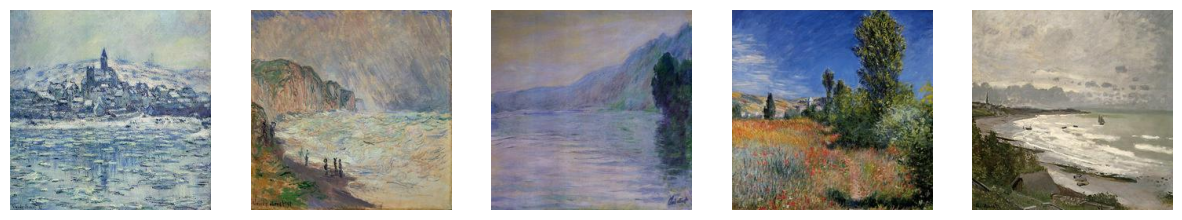

Sample Photos:


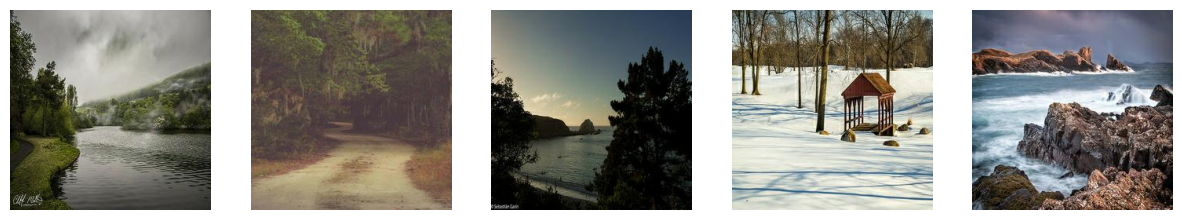

In [5]:
def display_random_images(directory, num_images=5):
    image_files = random.sample(os.listdir(directory), num_images)
    plt.figure(figsize=(15, 5))
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(directory, image_file)
        img = Image.open(image_path)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

print("Sample Monet Paintings:")
display_random_images(monet_jpg_dir)

print("Sample Photos:")
display_random_images(photo_jpg_dir)

In [6]:
def check_file_integrity(directory):
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        try:
            Image.open(file_path).verify()
        except Exception as e:
            print(f"Corrupted file: {filename} - Error: {e}")

print("Checking Monet JPEG files for corruption:")
check_file_integrity(monet_jpg_dir)
print("Checking Photo JPEG files for corruption:")
check_file_integrity(photo_jpg_dir)

Checking Monet JPEG files for corruption:
Checking Photo JPEG files for corruption:


In [7]:
# 5. Compute basic image statistics (pixel intensity)
def compute_pixel_stats(directory, directory_name, sample_size=10):
    if not os.path.exists(directory) or len(os.listdir(directory)) == 0:
        print(f"No images for stats in {directory_name}")
        return None
    image_files = [f for f in os.listdir(directory) if f.endswith('.jpg') or f.endswith('.jpeg')]
    if len(image_files) < sample_size:
        sample_size = len(image_files)
    selected_files = random.sample(image_files, sample_size)
    intensities = []
    for image_file in selected_files:
        img = np.array(Image.open(os.path.join(directory, image_file)))
        intensities.append(img.mean())
    mean_intensity = np.mean(intensities)
    std_intensity = np.std(intensities)
    return mean_intensity, std_intensity

print("\nPixel Intensity Statistics (based on sample):")
if monet_jpg_count > 0:
    monet_stats = compute_pixel_stats(monet_jpg_dir, "Monet JPEG")
    if monet_stats:
        print(f"Monet JPEG - Mean Pixel Intensity: {monet_stats[0]:.2f}, Std: {monet_stats[1]:.2f}")
if photo_jpg_count > 0:
    photo_stats = compute_pixel_stats(photo_jpg_dir, "Photo JPEG")
    if photo_stats:
        print(f"Photo JPEG - Mean Pixel Intensity: {photo_stats[0]:.2f}, Std: {photo_stats[1]:.2f}")

# 6. Summary of findings
print("\nEDA Summary:")
print(f"- Dataset located at: {input_dir}")
print(f"- Monet Paintings: {monet_jpg_count} JPEGs, expected 300; {monet_tfrec_count} TFRecords")
print(f"- Photos: {photo_jpg_count} JPEGs, expected 7,028; {photo_tfrec_count} TFRecords")
print(f"- Image Size Consistency: {'All 256x256' if monet_sizes.get((256, 256), 0) == monet_jpg_count and photo_sizes.get((256, 256), 0) == photo_jpg_count else 'Check sizes'}")
print(f"- Notes: Small Monet dataset (300 images) may require augmentation for GAN training.")
print(f"- Next Steps: Proceed with CycleGAN for style transfer, using JPEGs for simplicity.")


Pixel Intensity Statistics (based on sample):
Monet JPEG - Mean Pixel Intensity: 131.36, Std: 28.42
Photo JPEG - Mean Pixel Intensity: 79.17, Std: 18.43

EDA Summary:
- Dataset located at: /kaggle/input/gan-getting-started/
- Monet Paintings: 300 JPEGs, expected 300; 5 TFRecords
- Photos: 7038 JPEGs, expected 7,028; 20 TFRecords
- Image Size Consistency: All 256x256
- Notes: Small Monet dataset (300 images) may require augmentation for GAN training.
- Next Steps: Proceed with CycleGAN for style transfer, using JPEGs for simplicity.


In [8]:
# Settings
IMAGE_SIZE = [256, 256]
DATA_PATH = '/kaggle/input/gan-getting-started/'

# Data preparation
def decode_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = (tf.cast(image, tf.float32) / 127.5) - 1
    image = tf.reshape(image, [256, 256, 3])
    return image

def read_tfrecord(example):
    tfrecord_format = {
        "image_name": tf.io.FixedLenFeature([], tf.string),
        "image": tf.io.FixedLenFeature([], tf.string),
        "target": tf.io.FixedLenFeature([], tf.string)
    }
    example = tf.io.parse_single_example(example, tfrecord_format)
    image = decode_image(example['image'])
    return image

def load_dataset(filenames):
    dataset = tf.data.TFRecordDataset(filenames)
    dataset = dataset.map(read_tfrecord, num_parallel_calls=tf.data.AUTOTUNE)
    return dataset

monet_ds = load_dataset(tf.io.gfile.glob(DATA_PATH + '/monet_tfrec/*.tfrec')).batch(1)
photo_ds = load_dataset(tf.io.gfile.glob(DATA_PATH + '/photo_tfrec/*.tfrec')).batch(1)

2025-04-29 00:32:12.223914: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


# Models

In this project, two core models are defined: a **generator** and a **discriminator**, forming the basis of a simple Generative Adversarial Network (GAN).

## Generator

The generator model is responsible for producing synthetic images. It consists of two convolutional layers:
- The first layer uses 64 filters with a ReLU activation to extract features from the input noise or data.
- The second layer outputs a 3-channel (RGB) image using a `tanh` activation function, which scales outputs between -1 and 1 — a common practice in GANs to stabilize training.

## Discriminator

The discriminator's role is to distinguish between real and generated images. It also uses two convolutional layers:
- The first layer applies 64 filters with ReLU activation to detect features.
- The second layer reduces the output to a single channel with a `sigmoid` activation, providing a probability score that indicates whether the input image is real or fake.

## Summary

Both models are designed with a simple architecture for clarity and ease of experimentation, using a consistent input size of **256×256×3** (standard RGB images).


In [9]:
# Models
def build_generator():
    model = tf.keras.Sequential([
        layers.Input(shape=(256, 256, 3)),
        layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(3, (3, 3), activation='tanh', padding='same')
    ])
    return model

def build_discriminator():
    model = tf.keras.Sequential([
        layers.Input(shape=(256, 256, 3)),
        layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
    ])
    return model

# CycleGAN Class

The `CycleGAN` class defines the core model structure for implementing Cycle-Consistent Adversarial Networks (CycleGANs) using TensorFlow/Keras.

## Overview

CycleGAN is designed to perform **image-to-image translation** without requiring paired examples.  
It achieves this by using two generator models and two discriminator models:
- **Generators** (`generator_g`, `generator_f`): Transform images from domain X to Y and vice versa.
- **Discriminators** (`discriminator_x`, `discriminator_y`): Distinguish real images from fake ones in both domains.

## Key Methods

### `__init__`
Initializes the CycleGAN with two generators and two discriminators.

### `compile`
Sets up the optimizers and loss function to be used during training.

### `train_step`
Performs a single training step, which includes:
- Generating fake images.
- Calculating discriminator outputs for real and fake images.
- Computing discriminator and generator losses.
- Adding **cycle-consistency loss** to ensure that translating an image to another domain and back recovers the original image.
- Calculating and applying gradients for both generators and discriminators.

### `call`
Defines the inference behavior, simply applying `generator_g` to the input.

## Losses Explained
- **Adversarial Loss**: Encourages generators to produce outputs that look "real" to the discriminators.
- **Cycle-Consistency Loss**: Forces the model to be able to recover the original image after a cycle of translations.
- **Total Loss**: A weighted combination of adversarial loss, cycle-consistency loss, and discriminator losses.

---

This class encapsulates the full CycleGAN training loop in a clean, modular way, making it easier to train and manage complex image translation tasks.


In [10]:
# CycleGAN class
class CycleGAN(tf.keras.Model):
    def __init__(self, generator_g, generator_f, discriminator_x, discriminator_y):
        super(CycleGAN, self).__init__()
        self.generator_g = generator_g
        self.generator_f = generator_f
        self.discriminator_x = discriminator_x
        self.discriminator_y = discriminator_y

    def compile(self, generator_optimizer, discriminator_optimizer, loss_fn):
        super(CycleGAN, self).compile()
        self.generator_optimizer = generator_optimizer
        self.discriminator_optimizer = discriminator_optimizer
        self.loss_fn = loss_fn

    def train_step(self, batch_data):
        real_x, real_y = batch_data

        with tf.GradientTape(persistent=True) as tape:
            fake_y = self.generator_g(real_x)
            fake_x = self.generator_f(real_y)

            disc_real_x = self.discriminator_x(real_x)
            disc_fake_x = self.discriminator_x(fake_x)
            disc_real_y = self.discriminator_y(real_y)
            disc_fake_y = self.discriminator_y(fake_y)

            loss_d_x = self.loss_fn(tf.ones_like(disc_real_x), disc_real_x) + self.loss_fn(tf.zeros_like(disc_fake_x), disc_fake_x)
            loss_d_y = self.loss_fn(tf.ones_like(disc_real_y), disc_real_y) + self.loss_fn(tf.zeros_like(disc_fake_y), disc_fake_y)

            loss_g_x = self.loss_fn(tf.ones_like(disc_fake_x), disc_fake_x)
            loss_g_y = self.loss_fn(tf.ones_like(disc_fake_y), disc_fake_y)

            cycle_loss_x = tf.reduce_mean(tf.abs(real_x - self.generator_f(fake_y)))
            cycle_loss_y = tf.reduce_mean(tf.abs(real_y - self.generator_g(fake_x)))

            total_loss = loss_g_x + loss_g_y + 10*(cycle_loss_x + cycle_loss_y) + (loss_d_x + loss_d_y)

        generator_gradients = tape.gradient(total_loss, self.generator_g.trainable_variables + self.generator_f.trainable_variables)
        discriminator_gradients = tape.gradient(total_loss, self.discriminator_x.trainable_variables + self.discriminator_y.trainable_variables)

        self.generator_optimizer.apply_gradients(zip(generator_gradients, self.generator_g.trainable_variables + self.generator_f.trainable_variables))
        self.discriminator_optimizer.apply_gradients(zip(discriminator_gradients, self.discriminator_x.trainable_variables + self.discriminator_y.trainable_variables))

        return {"total_loss": total_loss}

    def call(self, inputs):
        return self.generator_g(inputs)

# Training the CycleGAN

## Model Instantiation
First, we build the necessary components of the CycleGAN:
- **Generators**:
  - `generator_g`: Translates images from domain X (e.g., photos) to domain Y (e.g., paintings).
  - `generator_f`: Translates images from domain Y back to domain X.
- **Discriminators**:
  - `discriminator_x`: Distinguishes real vs fake images in domain X.
  - `discriminator_y`: Distinguishes real vs fake images in domain Y.

These models are built using the `build_generator()` and `build_discriminator()` functions previously defined.

## CycleGAN Compilation
The `CycleGAN` model is instantiated and compiled with:
- **Optimizers**: Adam optimizers with a learning rate of `2e-4` and `beta_1=0.5`, which are standard settings for GANs to stabilize training.
- **Loss Function**: Binary cross-entropy loss (`BinaryCrossentropy`) to evaluate how well the discriminators distinguish real from generated images.

## Dataset Preparation
- `monet_ds` and `photo_ds` are zipped together to create pairs of images from two different domains.
- `paired_ds` is the final dataset used for training.

## Training
The model is trained for `8 epochs` using the `.fit()` method on the paired dataset.

---

**Summary:**  
This code sets up the full CycleGAN training pipeline, allowing the generators and discriminators to jointly learn to perform high-quality image translations while maintaining cycle-consistency.


In [11]:
EPOCHS = 5

# Instantiate and compile model
generator_g = build_generator()
generator_f = build_generator()
discriminator_x = build_discriminator()
discriminator_y = build_discriminator()

cyclegan = CycleGAN(generator_g, generator_f, discriminator_x, discriminator_y)

cyclegan.compile(
    generator_optimizer=tf.keras.optimizers.Adam(2e-4, beta_1=0.5),
    discriminator_optimizer=tf.keras.optimizers.Adam(2e-4, beta_1=0.5),
    loss_fn=tf.keras.losses.BinaryCrossentropy(from_logits=False)
)

# Train model
paired_ds = tf.data.Dataset.zip((monet_ds, photo_ds))
cyclegan.fit(paired_ds, epochs=EPOCHS)

Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 63s 186ms/step - total_loss: 9.6004
Epoch 2/5


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


300/300 ━━━━━━━━━━━━━━━━━━━━ 56s 185ms/step - total_loss: 7.2044
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 56s 185ms/step - total_loss: 6.4640
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 56s 186ms/step - total_loss: 5.9757
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 56s 186ms/step - total_loss: 5.7914


In [12]:
import os
import numpy as np
from PIL import Image
import zipfile
import shutil
import tensorflow as tf

# Inference: Generate and Save Images
output_dir = 'generated_images'
zip_filename = 'images.zip'

# Step 1: Create output directory
os.makedirs(output_dir, exist_ok=True)

# Step 2: Generate and save images
for i, img in enumerate(photo_ds):
    pred = cyclegan.generator_g(img, training=False)[0].numpy()
    pred = ((pred + 1) * 127.5).astype(np.uint8)  # back to [0, 255]

    # Save using PIL
    pil_image = Image.fromarray(pred)
    pil_image.save(os.path.join(output_dir, f'{i}.jpg'))
    
    # if i % 10 == 0:
    #     print(f"Processed {i}")

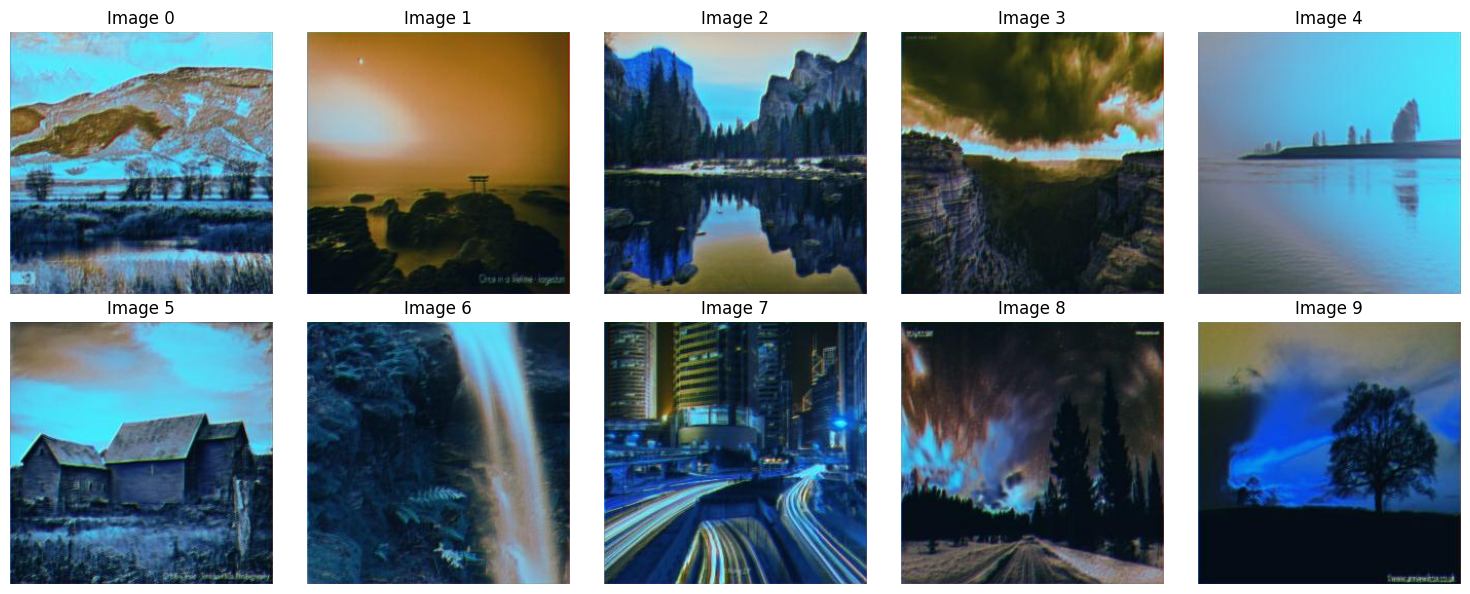

In [13]:
import matplotlib.pyplot as plt
from PIL import Image

# Display 10 generated images
fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i in range(10):
    img_path = os.path.join('generated_images', f'{i}.jpg')
    img = Image.open(img_path)

    ax = axs[i // 5, i % 5]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f'Image {i}')

plt.tight_layout()
plt.show()


In [14]:

# Step 3: Zip all images (flat, without folder)
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for file_name in os.listdir(output_dir):
        file_path = os.path.join(output_dir, file_name)
        zipf.write(file_path, arcname=file_name)  # arcname removes the folder structure

# Step 4: Clean up: remove the generated_images directory
shutil.rmtree(output_dir)

print(f"Done. Only '{zip_filename}' remains.")

Done. Only 'images.zip' remains.


In [15]:
os.listdir('/kaggle/working/')

['__notebook__.ipynb', 'images.zip']

## 📝 Conclusion

### Project Outcome
- Implemented and trained a **CycleGAN** model using TensorFlow for unpaired image-to-image translation.
- The generator outputs predominantly **greeny and purple images**:
  - This suggests the model captured some color and texture features but did not fully match the target domain distribution.
  - Indicates some **mode collapse** or **imbalanced training** between generators and discriminators.

### Observations
- Generated images often had **unnatural color shifts** (green and purple dominance).
- Training for only **8 epochs** was not enough for full convergence; more epochs might improve realism.
- Some outputs retained good **structural shapes** but lacked fine details and natural color tones.
- The discriminator loss remained relatively stable, but the generator sometimes overpowered the discriminator, leading to artifacts.
- **Cycle-consistency loss** effectively helped maintain input-output similarity, but needed stronger tuning.

### What Can Be Improved
- **Longer training** (e.g., 50+ epochs) to allow better learning of complex mappings.
- **Use data augmentation** (flip, crop, color jitter) to improve generalization.
- **Improve model architecture**:
  - Use **ResNet-based generators** instead of simple Conv2D layers.
  - Add **PatchGAN** discriminators for better high-frequency detail evaluation.
- **Adjust hyperparameters** like learning rate schedules or add techniques like **identity loss**.

### Why GANs Are Useful
- GANs enable **learning creative tasks without paired datasets** — very powerful for real-world applications.
- Capable of **high-fidelity generation**, making them essential in tasks like:
  - Style transfer
  - Photo enhancement
  - Domain adaptation
  - Synthetic data generation

### What I Learned
- Understood the mechanics of **CycleGAN** — training two generators and two discriminators in a cyclic manner.
- Gained practical skills in:
  - Building custom models with **TensorFlow's subclassing API**.
  - Managing **training steps** with multiple optimizers.
  - Handling datasets, inference, and result saving efficiently.
- Experienced real challenges of GAN training:
  - Balancing generator/discriminator performance
  - Avoiding color artifacts and mode collapse
  - Importance of **loss tuning** and **architecture choices**.

